In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.7MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data_f = data2.loc[data2.team1.isin(['Kings XI Punjab','Mumbai Indians'])] 
data_f = data_f.loc[data_f.team2.isin(['Kings XI Punjab','Mumbai Indians'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
21,22,2017,Indore,2017-04-20,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,JC Buttler,Holkar Cricket Stadium,M Erasmus,C Shamshuddin,NaN
49,50,2017,Mumbai,2017-05-11,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,7,0,WP Saha,Wankhede Stadium,A Deshmukh,A Nand Kishore,NaN
68,69,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN
105,106,2008,Mumbai,2008-05-21,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,1,0,SE Marsh,Wankhede Stadium,BF Bowden,GA Pratapkumar,NaN
134,135,2009,Durban,2009-04-29,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Kings XI Punjab,3,0,KC Sangakkara,Kingsmead,MR Benson,SL Shastri,NaN
156,157,2009,Centurion,2009-05-12,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Mumbai Indians,0,8,Harbhajan Singh,SuperSport Park,SS Hazare,RE Koertzen,NaN
200,201,2010,Mumbai,2010-03-30,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,SL Malinga,Brabourne Stadium,BR Doctrove,SK Tarapore,NaN
214,215,2010,Chandigarh,2010-04-09,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,6,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",M Erasmus,AM Saheba,NaN
272,273,2011,Mumbai,2011-05-02,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,field,normal,0,Mumbai Indians,23,0,KA Pollard,Wankhede Stadium,HDPK Dharmasena,PR Reiffel,NaN
286,287,2011,Chandigarh,2011-05-10,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,76,0,BA Bhatt,"Punjab Cricket Association Stadium, Mohali",SK Tarapore,RJ Tucker,NaN


Finally , We have got a complete dataset for all the matches of  MI VS KXIP

**Let's do Q1 now**

MI Wins - 13
KXIP Wins - 11


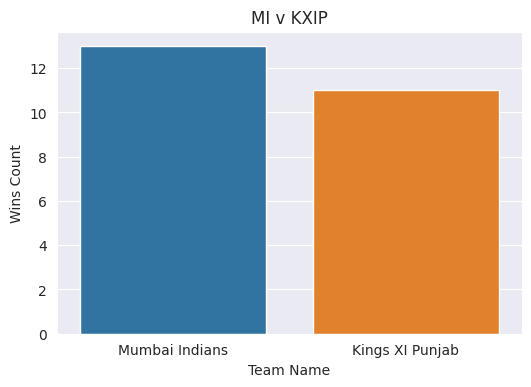

In [13]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('MI v KXIP')
A,B =data_f.winner.value_counts()

print('MI Wins -',A)
print('KXIP Wins -',B)

plt.show()


Let's support MI as they have advantage

**Let's do Q2 now**

**Quinton De Kock wicket by seam/spin**

In [17]:
data_s = data.loc[data.bowling_team.isin(['Kings XI Punjab'])]
data_s = data_s.loc[data.batsman.isin(['Q de Kock'])]
data_s

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
95921,405,2,Sunrisers Hyderabad,Kings XI Punjab,1,1,Q de Kock,PA Reddy,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
95922,405,2,Sunrisers Hyderabad,Kings XI Punjab,1,2,Q de Kock,PA Reddy,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
95923,405,2,Sunrisers Hyderabad,Kings XI Punjab,1,3,Q de Kock,PA Reddy,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
95924,405,2,Sunrisers Hyderabad,Kings XI Punjab,1,4,Q de Kock,PA Reddy,P Kumar,0,0,0,0,0,0,0,0,0,Q de Kock,bowled,NaN
137867,583,2,Delhi Daredevils,Kings XI Punjab,1,1,Q de Kock,SS Iyer,Sandeep Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170504,11315,2,Mumbai Indians,Kings XI Punjab,8,6,Q de Kock,KA Pollard,S Curran,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
170505,11315,2,Mumbai Indians,Kings XI Punjab,9,1,Q de Kock,KA Pollard,R Ashwin,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
170506,11315,2,Mumbai Indians,Kings XI Punjab,9,2,Q de Kock,KA Pollard,R Ashwin,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
170507,11315,2,Mumbai Indians,Kings XI Punjab,9,3,Q de Kock,KA Pollard,R Ashwin,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [37]:
data_st = data_s.loc[:,['bowler','dismissal_kind']]
data_st =  data_s.dropna(subset = ["dismissal_kind"],inplace=True)
data_st

,bowler,dismissal_kind
95924,P Kumar,bowled
144840,MP Stoinis,caught
152236,R Ashwin,bowled
166772,Mohammed Shami,lbw
170509,R Ashwin,caught


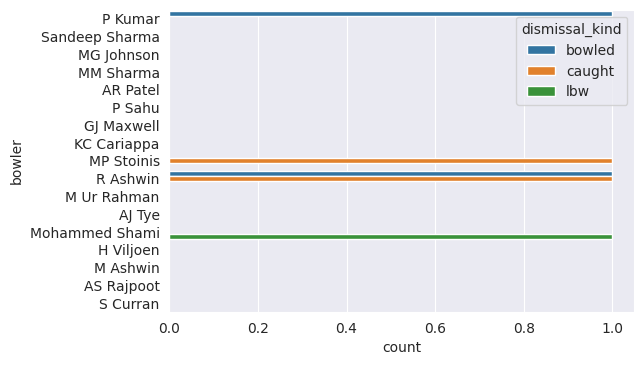

In [27]:
plt.figure(dpi=100)
sns.countplot(y='bowler',hue='dismissal_kind',data=data_s)
plt.show()


As we can see De Kock has got out 3 times against a fast bowler v KXIP . So let's mark Seam/Fast

**For Q3, Let's find average wickets lost by KXIP in first 6 overs v MI**

In [38]:
data_n = data.loc[data.bowling_team.isin(['Mumbai Indians'])]
data_n = data_n.loc[data.batting_team.isin(['Kings XI Punjab'])]
data_n = data_n.loc[(data_n.over <=6)]
data_n

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5055,22,1,Kings XI Punjab,Mumbai Indians,1,1,HM Amla,SE Marsh,HH Pandya,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
5056,22,1,Kings XI Punjab,Mumbai Indians,1,2,SE Marsh,HM Amla,HH Pandya,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
5057,22,1,Kings XI Punjab,Mumbai Indians,1,3,SE Marsh,HM Amla,HH Pandya,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
5058,22,1,Kings XI Punjab,Mumbai Indians,1,4,SE Marsh,HM Amla,HH Pandya,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
5059,22,1,Kings XI Punjab,Mumbai Indians,1,5,SE Marsh,HM Amla,HH Pandya,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170363,11315,1,Kings XI Punjab,Mumbai Indians,6,2,CH Gayle,KL Rahul,JJ Bumrah,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
170364,11315,1,Kings XI Punjab,Mumbai Indians,6,3,CH Gayle,KL Rahul,JJ Bumrah,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
170365,11315,1,Kings XI Punjab,Mumbai Indians,6,4,KL Rahul,CH Gayle,JJ Bumrah,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
170366,11315,1,Kings XI Punjab,Mumbai Indians,6,5,KL Rahul,CH Gayle,JJ Bumrah,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [39]:
data_n.player_dismissed.value_counts().sum() # Wickets lost by KXIP v MI between 1-6 overs

28

In [40]:
data_n.match_id.nunique() 

24

In [42]:
np.round(28/24,2) # Average Wickets lost by KXIP v MI in first 6 overs

1.17

Let's mark 0-1 there considering our analysis

**Let's do Q4**

**Let's find Rahul's dismissals v MI**

In [44]:
data_b = data.loc[data.bowling_team.isin(['Mumbai Indians'])]
data_b = data_b.loc[data.batsman.isin(['KL Rahul'])]
data_b

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
112940,477,1,Sunrisers Hyderabad,Mumbai Indians,3,5,KL Rahul,AJ Finch,Z Khan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
112941,477,1,Sunrisers Hyderabad,Mumbai Indians,3,6,KL Rahul,AJ Finch,Z Khan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
112945,477,1,Sunrisers Hyderabad,Mumbai Indians,4,4,KL Rahul,AJ Finch,PP Ojha,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
112946,477,1,Sunrisers Hyderabad,Mumbai Indians,4,5,KL Rahul,AJ Finch,PP Ojha,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
112947,477,1,Sunrisers Hyderabad,Mumbai Indians,4,6,KL Rahul,AJ Finch,PP Ojha,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170451,11315,1,Kings XI Punjab,Mumbai Indians,20,1,KL Rahul,Mandeep Singh,JJ Bumrah,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
170452,11315,1,Kings XI Punjab,Mumbai Indians,20,2,KL Rahul,Mandeep Singh,JJ Bumrah,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
170453,11315,1,Kings XI Punjab,Mumbai Indians,20,3,KL Rahul,Mandeep Singh,JJ Bumrah,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
170454,11315,1,Kings XI Punjab,Mumbai Indians,20,4,KL Rahul,Mandeep Singh,JJ Bumrah,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


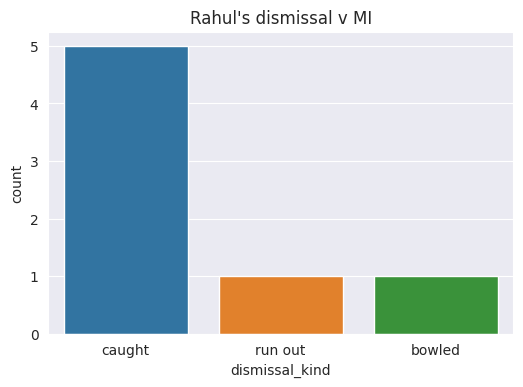

In [45]:
plt.figure(dpi=100)
sns.countplot(x=data_b.dismissal_kind, data=data_b)
plt.title('Rahul\'s dismissal v MI')
plt.show()

Let's mark Caught considering our analysis

**Let's do Q5 now**

**Let's find average wickets lost in KXIP v MI**

In [46]:
data_t = data.loc[data.bowling_team.isin(['Mumbai Indians','Kings XI Punjab'])]
data_t = data_t.loc[data.batting_team.isin(['Kings XI Punjab','Mumbai Indians'])]
data_t

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5055,22,1,Kings XI Punjab,Mumbai Indians,1,1,HM Amla,SE Marsh,HH Pandya,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
5056,22,1,Kings XI Punjab,Mumbai Indians,1,2,SE Marsh,HM Amla,HH Pandya,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
5057,22,1,Kings XI Punjab,Mumbai Indians,1,3,SE Marsh,HM Amla,HH Pandya,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
5058,22,1,Kings XI Punjab,Mumbai Indians,1,4,SE Marsh,HM Amla,HH Pandya,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
5059,22,1,Kings XI Punjab,Mumbai Indians,1,5,SE Marsh,HM Amla,HH Pandya,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170579,11315,2,Mumbai Indians,Kings XI Punjab,20,3,KA Pollard,A Joseph,AS Rajpoot,0,0,0,0,0,0,0,0,0,KA Pollard,caught,DA Miller
170580,11315,2,Mumbai Indians,Kings XI Punjab,20,4,A Joseph,RD Chahar,AS Rajpoot,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
170581,11315,2,Mumbai Indians,Kings XI Punjab,20,5,A Joseph,RD Chahar,AS Rajpoot,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
170582,11315,2,Mumbai Indians,Kings XI Punjab,20,6,RD Chahar,A Joseph,AS Rajpoot,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [49]:
data_t.player_dismissed.value_counts().sum()

294

In [50]:
data_t.match_id.nunique()

24

In [51]:
np.round(294/24,2) # Average Wickets lost in KXIP v MI contest

12.25

Let's mark 11-15 there.

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

